In [1]:
from _125_126_GAN_training_mnist import build_generator, build_discriminator, save_imgs
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

2024-05-07 18:15:33.157346: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 18:15:34.441991: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

#Let us also define our optimizer for easy use later on.
#That way if you change your mind, you can change it easily here
optimizer = Adam(0.0002, 0.5)  #Learning rate and momentum.
batch_size=128
save_interval=50
epochs = 100

# Build and compile the discriminator first. 
# Generator will be trained as part of the combined model, later. 
# pick the loss function and the type of metric to keep track.                 
# Binary cross entropy as we are doing prediction and it is a better
# loss function compared to MSE or other. 
discriminator = build_discriminator()

# Initialzing the discriminator
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

#build and compile our Discriminator, pick the loss function

#Since we are only generating (faking) images, let us not track any metrics.
generator = build_generator()

# Initialzing the discriminator
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

## This builds the Generator and defines the input noise. 
# In a GAN the Generator network takes noise z as an input to produce its images.  
z = Input(shape=(100,))   #Our random input to the generator
img = generator(z)

#This ensures that when we combine our networks we only train the Generator.
#While generator training we do not want discriminator weights to be adjusted. 
#This Doesn't affect the above discriminator training.     
discriminator.trainable = False  

#This specifies that our Discriminator will take the images generated by our Generator
#and true dataset and set its output to a parameter called valid, which will indicate
#whether the input is real or not.  
valid = discriminator(img)  #Validity check on the generated image


# Here we combined the models and also set our loss function and optimizer. 
# Again, we are only training the generator here. 
# The ultimate goal here is for the Generator to fool the Discriminator.  
# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity

combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

2024-05-07 18:15:36.417406: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-07 18:15:36.417859: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/helldiver/.virtualenvs/ml_scratch/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/helldiver/.virtualenvs/ml_scratch/lib/pytho

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

/home/helldiver/.virtualenvs/ml_scratch/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,493,520 (5.70 MB)

 Trainable params: 1,489,936 (5.68 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [13]:
# Load the dataset
(X_train, _), (_, _) = mnist.load_data()

# Convert to float and Rescale -1 to 1 (Can also do 0 to 1)
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Add channels dimension. As the input to our gen and discrimantor. has a shape 28x28x1.
X_train = np.expand_dims(X_train, axis=3) 

half_batch = int(batch_size / 2)


# We then loop through a number of epochs to train our Discriminator by first selecting
# a random batch of images from our true dataset, generating a set of images from our
# Generator, feeding both set of images into our Discriminator, and finally setting the
# loss parameters for both the real and fake images, as well as the combined loss. 
    
for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # 1st: Select a random half batch of real images from the 
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]

    # Initializing the noise vector
    noise = np.random.normal(0, 1, (half_batch, 100))

    # Generate a half batch of fake images
    gen_imgs = generator.predict(noise)

    # Train the discriminator on real and fake images, separately
    # Research showed that separate training is more effective. ( let's trust this )
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))

#take average loss from real and fake images. 
#
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) 
    #print(f"shape d_loss: {d_loss.shape}")

#And within the same loop we train our Generator, by setting the input noise and
#ultimately training the Generator to have the Discriminator label its samples as valid
#by specifying the gradient loss.
    # ---------------------
    #  Train Generator
    # ---------------------
#Create noise vectors as input for generator. 
#Create as many noise vectors as defined by the batch size. 
#Based on normal distribution. Output will be of size (batch size, 100)
    noise = np.random.normal(0, 1, (batch_size, 100)) 

    # The generator wants the discriminator to label the generated samples
    # as valid (ones)
    #This is where the generator is trying to trick discriminator into believing
    #the generated image is true (hence value of 1 for y)
    valid_y = np.array([1] * batch_size) #Creates an array of all ones of size=batch size

    # Generator is part of combined where it got directly linked with the discriminator
    # Train the generator with noise as x and 1 as y. 
    # Again, 1 as the output as it is adversarial and if generator did a great
    # job of following the discriminator then the output would be 1 (true)
    g_loss = combined.train_on_batch(noise, valid_y)


#Additionally, in order for us to keep track of our training process, we print the
#progress and save the sample image output depending on the epoch interval specified.  
# Plot the progress
    
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss[0]))

    # If at save interval => save generated image samples
    if epoch % save_interval == 0:
        save_imgs(epoch, generator)

#when the specific sample_interval is hit, we call the
#sample_image function. Which looks as follows.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
shape d_loss: (2,)
0 [D loss: 2.069599, acc.: 2.47%] [G loss: 2.074542]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
shape d_loss: (2,)
1 [D loss: 2.075369, acc.: 2.46%] [G loss: 2.080458]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
shape d_loss: (2,)
2 [D loss: 2.081326, acc.: 2.46%] [G loss: 2.086384]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
shape d_loss: (2,)
3 [D loss: 2.087694, acc.: 2.45%] [G loss: 2.092793]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
shape d_loss: (2,)
4 [D loss: 2.093770, acc.: 2.44%] [G loss: 2.098971]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
shape d_loss: (2,)
5 [D loss: 2.100011, acc.: 2.44%] [G loss: 2.104994]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
shape d_loss: (2,)
6 [D loss: 2.105526, acc.: 2.44%] [G loss: 2.110137]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
shape d_loss: (2,)
7 [D loss: 2.110885, acc.: 2.44%] [G loss: 2.115779]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
shape d_loss: (2,)
8 [D loss: 2.116512, acc.

In [8]:
#Save model for future use to generate fake images
#Not tested yet... make sure right model is being saved..
#Compare with GAN4

generator.save('models/generator_model.h5')  #Test the model on GAN4_predict...
#Change epochs back to 30K

#Epochs dictate the number of backward and forward propagations, the batch_size
#indicates the number of training samples per backward/forward propagation, and the
#sample_interval specifies after how many epochs we call our sample_image function.

In [9]:
#FOr single image
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
from numpy.random import randn


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


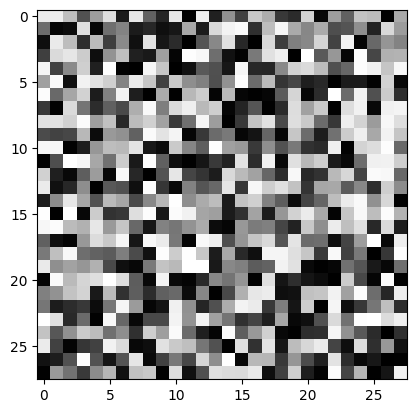

In [10]:
# load model
model = load_model('models/generator_model.h5')

#To create same image, suppy same vector each time
# all 0s
#vector = asarray([[0. for _ in range(100)]])  #Vector of all zeros

#To create random images each time...
vector = randn(100) #Vector of random numbers (creates a column, need to reshape)
vector = vector.reshape(1, 100)

# generate image
X = model.predict(vector)

# plot the result
pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


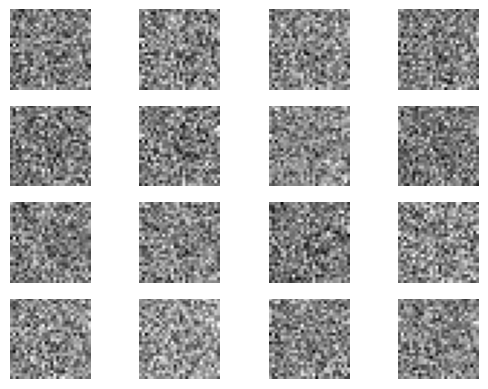

In [11]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	plt.show()

# load model
model = load_model('generator_model.h5')
# generate images
#Generate 16 images, each image provide a vector of size 100 as input
latent_points = generate_latent_points(100, 16) 
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 4)  #Plot 4x4 grid (Change to 5 if generating 25 images)
